In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

sns.set(rc={'figure.figsize':(20,10)})


file_stubs = [
    'Log_Report_g_%s_d_%s.txt',
    'Log_Report_g_%s_d_%s-longer.txt',
]

In [41]:
stub = 0

g_p_1 = 0.5
d_p_1 = 0.5

g_p_2 = 0.5
d_p_2 = 0.1

g_loss_1 = []
d_loss_1 = []

g_loss_2 = []
d_loss_2 = []

f_1 = open(file_stubs[stub] % (g_p_1, d_p_1), "r")
f_2 = open(file_stubs[stub] % (g_p_2, d_p_2), "r")

In [42]:
for line in f_1:
    split_line = line.split(" ")
    d_loss_1.append(float(split_line[0]))
    g_loss_1.append(float(split_line[1]))
    
for line in f_2:
    split_line = line.split(" ")
    d_loss_2.append(float(split_line[0]))
    g_loss_2.append(float(split_line[1]))

In [43]:
print(len(g_loss_1))
print(len(d_loss_1))

print(len(g_loss_2))
print(len(d_loss_2))

12000
12000
12000
12000


In [44]:
cols = [
    'Batch',
    'Type',
    'Loss-g_%s-d_%s' % (g_p_1, d_p_1),
    'Run_Avg-g_%s-d_%s' % (g_p_1, d_p_1),
    'Loss-g_%s-d_%s' % (g_p_2, d_p_2),
    'Run_Avg-g_%s-d_%s' % (g_p_2, d_p_2),
]



diff_loss = pd.DataFrame(columns = cols)

In [45]:
diff_loss

,Batch,Type,Loss-g_0.5-d_0.5,Run_Avg-g_0.5-d_0.5,Loss-g_0.5-d_0.1,Run_Avg-g_0.5-d_0.1


In [46]:
n_1 = 1
sum_g_1 = 0
sum_g_2 = 0
avg_g_1 = 0
avg_g_2 = 0

n_2 = 1
sum_d_1 = 0
sum_d_2 = 0
avg_d_1 = 0
avg_d_2 = 0

for i in range(0, len(g_loss_1)):
    sum_g_1 += g_loss_1[i]
    sum_g_2 += g_loss_2[i]
    sum_d_1 += d_loss_1[i]
    sum_d_2 += d_loss_2[i]
    
    avg_g_1 = sum_g_1/n_1
    avg_g_2 = sum_g_2/n_1
    avg_d_1 = sum_d_1/n_2
    avg_d_2 = sum_d_2/n_2
    
    diff_loss = diff_loss.append({'Batch': i+1, 
                                  'Type': "Generator", 
                                  'Loss-g_%s-d_%s' % (g_p_1, d_p_1): g_loss_1[i],
                                  'Run_Avg-g_%s-d_%s' % (g_p_1, d_p_1): avg_g_1,
                                  'Loss-g_%s-d_%s' % (g_p_2, d_p_2): g_loss_2[i],
                                  'Run_Avg-g_%s-d_%s' % (g_p_2, d_p_2): avg_g_2
                                 }, ignore_index=True)
    
    diff_loss = diff_loss.append({'Batch': i+1, 
                                  'Type': "Discriminator", 
                                  'Loss-g_%s-d_%s' % (g_p_1, d_p_1): d_loss_1[i],
                                  'Run_Avg-g_%s-d_%s' % (g_p_1, d_p_1): avg_d_1,
                                  'Loss-g_%s-d_%s' % (g_p_2, d_p_2): d_loss_2[i],
                                  'Run_Avg-g_%s-d_%s' % (g_p_2, d_p_2): avg_d_2
                                 }, ignore_index=True)
    
    n_1 += 1
    n_2 += 1

In [47]:
diff_loss

,Batch,Type,Loss-g_0.5-d_0.5,Run_Avg-g_0.5-d_0.5,Loss-g_0.5-d_0.1,Run_Avg-g_0.5-d_0.1
0,1,Generator,55.454979,55.454979,72.693306,72.693306
1,1,Discriminator,2.802995,2.802995,1.591813,1.591813
2,2,Generator,59.819118,57.637049,55.564667,64.128986
3,2,Discriminator,2.743360,2.773178,1.691044,1.641428
4,3,Generator,61.846661,59.040253,55.971252,61.409742
...,...,...,...,...,...,...
23995,11998,Discriminator,0.021882,0.119514,0.126080,0.088792
23996,11999,Generator,8.373435,13.352641,8.056998,13.220666
23997,11999,Discriminator,0.059939,0.119510,0.161056,0.088798
23998,12000,Generator,8.021041,13.352197,14.383135,13.220763


C:\Users\lawso\AppData\Local\Continuum\anaconda3\envs\geospatial\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


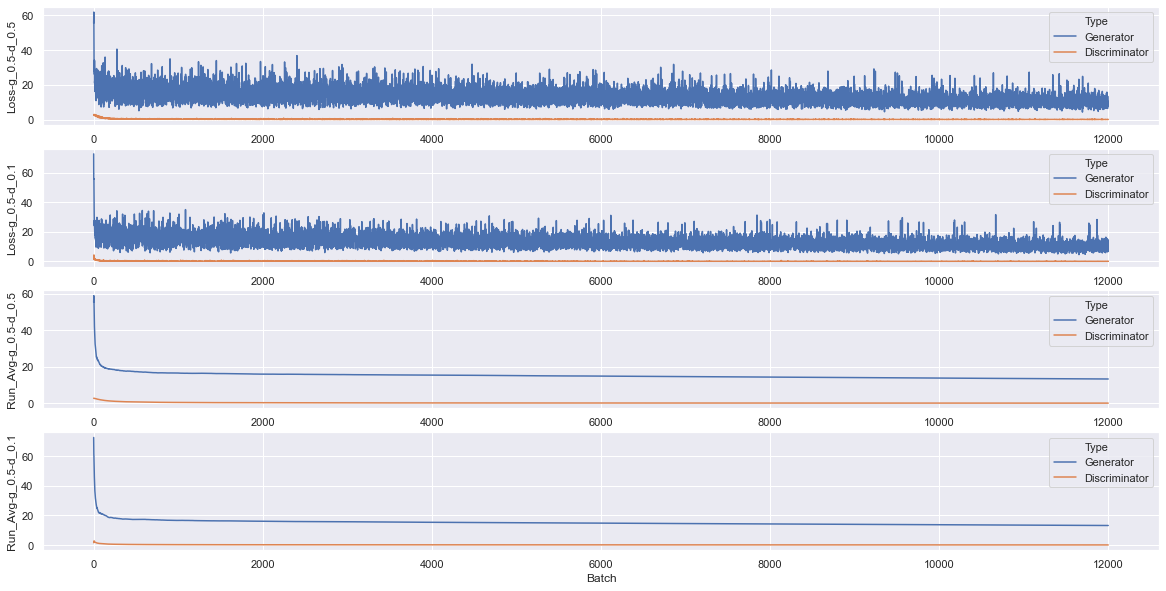

In [48]:
fig, ax = plt.subplots(4,1)

sns.lineplot(x="Batch", y='Loss-g_%s-d_%s' % (g_p_1, d_p_1),
             hue="Type", markers=True, 
             dashes=False, data=diff_loss,
             ax=ax[0])

sns.lineplot(x="Batch", y='Loss-g_%s-d_%s' % (g_p_2, d_p_2),
             hue="Type", markers=True, 
             dashes=False, data=diff_loss,
             ax=ax[1])

sns.lineplot(x="Batch", y='Run_Avg-g_%s-d_%s' % (g_p_1, d_p_1),
             hue="Type", markers=True, 
             dashes=False, data=diff_loss,
             ax=ax[2])

sns.lineplot(x="Batch", y='Run_Avg-g_%s-d_%s' % (g_p_2, d_p_2),
             hue="Type", markers=True, 
             dashes=False, data=diff_loss,
             ax=ax[3])

fig.show()


Split

In [34]:
diff_Gen = diff_removed[diff_removed["Type"] == "Generator"]
diff_Dcr = diff_removed[diff_removed["Type"] == "Discriminator"]

diff_Gen = diff_Gen.reset_index()
diff_Dcr = diff_Dcr.reset_index()

In [32]:
dropping = []

for i in range(100):
    dropping.append(i)

diff_g_removed = diff_Gen.drop(dropping)
diff_d_removed = diff_Dcr.drop(dropping)

In [33]:
diff_g_removed = diff_g_removed.reset_index()
diff_d_removed = diff_d_removed.reset_index()

,index,time,Type,Loss-0.5,Run_Avg-0.5,Loss-0.1,Run_Avg-0.1
0,100,101,Generator,14.467754,21.717234,20.681526,19.661058
1,101,102,Generator,16.756271,21.668597,12.916254,19.594932
2,102,103,Generator,12.930394,21.583760,18.665268,19.585906
3,103,104,Generator,13.245517,21.503585,20.168358,19.591507
4,104,105,Generator,10.026020,21.394274,14.538659,19.543384
...,...,...,...,...,...,...,...
23795,23995,11996,Discriminator,0.072374,0.070624,0.111020,0.072222
23796,23996,11997,Discriminator,0.226703,0.070637,0.017181,0.072218
23797,23997,11998,Discriminator,0.043666,0.070634,0.054820,0.072216
23798,23998,11999,Discriminator,0.045807,0.070632,0.011907,0.072211


In [40]:
gen_X_1 = diff_g_removed.iloc[:,2].values.reshape(-1,1)
gen_Y_1 = diff_g_removed.iloc[:,4].values.reshape(-1,1)

dcr_X_1 = diff_d_removed.iloc[:,2].values.reshape(-1,1)
dcr_Y_1 = diff_d_removed.iloc[:,4].values.reshape(-1,1)


gen_X_2 = diff_g_removed.iloc[:,2].values.reshape(-1,1)
gen_Y_2 = diff_g_removed.iloc[:,6].values.reshape(-1,1)

dcr_X_2 = diff_d_removed.iloc[:,2].values.reshape(-1,1)
dcr_Y_2 = diff_d_removed.iloc[:,6].values.reshape(-1,1)

In [43]:
lin_reg_gen_1 = LinearRegression()
lin_reg_dcr_1 = LinearRegression()

lin_reg_gen_2 = LinearRegression()
lin_reg_dcr_2 = LinearRegression()

In [44]:
lin_reg_gen_1.fit(gen_X_1, gen_Y_1)
lin_reg_dcr_1.fit(dcr_X_1, dcr_Y_1)

lin_reg_gen_2.fit(gen_X_2, gen_Y_2)
lin_reg_dcr_2.fit(dcr_X_2, dcr_Y_2)

LinearRegression()

In [57]:
gen_1_weights = [
    lin_reg_gen_1.coef_[0][0],
    lin_reg_gen_1.intercept_[0]
]

dcr_1_weights = [
    lin_reg_dcr_1.coef_[0][0],
    lin_reg_dcr_1.intercept_[0]
]

gen_2_weights = [
    lin_reg_gen_2.coef_[0][0],
    lin_reg_gen_2.intercept_[0]    
]

dcr_2_weights = [
    lin_reg_dcr_2.coef_[0][0],
    lin_reg_dcr_2.intercept_[0]    
]

In [58]:
print(gen_1_weights[0], gen_1_weights[1])
print(dcr_1_weights[0], dcr_1_weights[1])
print(gen_2_weights[0], gen_2_weights[1])
print(dcr_2_weights[0], dcr_2_weights[1])

-0.00041768144177679336 16.191091103386455
-1.0234035977637133e-05 0.1263805949347943
-0.0005340298642465627 16.521020539590214
-1.0068042484830042e-05 0.12728515223093476


In [60]:
A_1 = np.array([
          [1, -1 * gen_1_weights[0]],
          [1, -1 * dcr_1_weights[0]]
         ])

b_1 = np.array([
         [gen_1_weights[1]],
         [dcr_1_weights[1]]
         ])

A_2 = np.array([
          [1, -1 * gen_2_weights[0]],
          [1, -1 * dcr_2_weights[0]]
         ])

b_2 = np.array([
         [gen_2_weights[1]],
         [dcr_2_weights[1]]
         ])

x_1 = np.linalg.solve(A_1, b_1)
x_2 = np.linalg.solve(A_2, b_2)

print(x_1)
print(x_2)

[[-2.77123816e-01]
 [ 3.94276912e+04]]
[[-1.87724105e-01]
 [ 3.12880342e+04]]


In [11]:
temp = True

print("Thing is %" % (temp))

Thing is 1
